# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="C://Users/viren/Desktop/p3_collab-compet/Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### Report

So far, we have loaded our Unity environment and tested a random agent to ensure that everything works as expected. Now begins the code that will train and use DDPG agents to solve the problem.

Let us start by importing all the remaining files we need to make this happen. Please note that MADDPG, imported in the line **from maddpg import MADDPG**, uses a modified version of the DDPG code used in the Pendulum project present in Udacity's Github repository for this nanodegree. This file (and its dependencies *Actor* and *Critic* from the *model.py* file) are also imported at this stage.

In [7]:
import torch

from collections import deque

from maddpg import MADDPG

import matplotlib.pyplot as plt
%matplotlib inline

We will now instantiate the agents. The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Each agent receives its own, local observation. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping.

All this information is passed to our agents in the next code cell.

In [8]:
agents = MADDPG(state_size, action_size, 2)

### 1. Learning Algorithm

**Explanation of the Learning Algorithm**

**DDPG (Deep Deterministic Policy Gradient):** This is a type of Actor-Critic method and can be seen as an approximate Deep Q-Network instead of an actual Actor-Critic. Here, the Critic is used to approximate the maximizer over the next state's Q-values and not as a learned baseline.

One of the limitations of the Deep Q-Learning agent is that it is not straightforward to use in continuous action spaces. In DDPG, we use two neural networks- the "Actor" and the "Critic". The Actor is used to approximate the optimal policy deterministically- outputting the best-believed action for any given state. This is unlike stochastic policies, where we want the policy to learn a probability distribution over the actions. The Actor essentially learns the arg_max a Q(s, a), which is the best action. The Critic learns to evaluate the optimal action-value function by using the action the Actor believes to be the best. We use the Actor, an approximate maximizer, to calculate a new target value for training the action-value function in the way Deep Q-Networks do.

DDPGs use Replay Buffers and make "soft-updates" to the target networks. In Deep Q-Networks, we maintain two copies of the network weights, the regular and target networks. The target network is updated, say, every 10,000-time steps, by copying the regular network's weights. In DDPGs, there are 4 networks- a regular and a target for the Actor and the Critic. The target networks are updated with soft-updates, that is, slowly blending the regular network weights with the target's, over a period of time, and not all at once. In practice, this yields faster convergence and can be used with other algorithms that use target networks.

**Modifications in MADDPG:** To make DDPG work in a multi-agent scenario, certain changes need to be made. We start by creating a new Python file, `maddpg.py`. Then, we move the ReplayBuffer logic into this file and create a class that handles both agents; we create custom `step`, `act`, and `reset` methods that handle both agents. The logic is as follows: A common replay buffer is shared between the agents. Both agents draw from this buffer, and both add to the buffer as well. Thus, the agents learn from each other's experiences.

```
class MADDPG:
    def __init__(self, state_size, action_size, seed):
        super(MADDPG, self).__init__()
        
        self.maddpg_agents = [DDPGAgent(state_size, action_size, 1*seed),
                              DDPGAgent(state_size, action_size, 2*seed)]
        
        self.memory = ReplayBuffer(BUFFER_SIZE, BATCH_SIZE, seed)

    def step(self, time_step, states, actions, rewards, next_states, dones):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        
        # Save experience / reward for the agents
        self.memory.add(states[0], actions[0], rewards[0], next_states[0], dones[0])
        self.memory.add(states[1], actions[1], rewards[1], next_states[1], dones[1])

        # Learn, if enough samples are available in memory
        if len(self.memory) > BATCH_SIZE:
            
            for agent in self.maddpg_agents:
                experiences = self.memory.sample()
                agent.step(experiences)
                    
    def act(self, states):
        """For each agent, return the action to take"""
        
        actions = np.zeros([2, 2]) # 2 agents and action consists of 2 values
        
        actions[0, :] = self.maddpg_agents[0].act(states[0])
        actions[1, :] = self.maddpg_agents[1].act(states[1])
        
        return actions
        
    def reset(self):        
        for agent in self.maddpg_agents:
            agent.reset()
```

Some modifications have to be made to the ddpg code as well. We use Gaussian noise instead of OUNoise and have the noise decay with each timestep. This allows the training to converge.

**Explanation of Hyperparameters used**

`BUFFER_SIZE = int(1e5)`

The size of the Replay Buffer that holds tuples of experiences that can be selected multiple times.

`BATCH_SIZE = 256`

The number of entries from the Replay Buffer that are considered a part of each batch.

`GAMMA = 0.95`

The hyperparameter that prioritizes how much weightage is given to recently received rewards, as compared to previous rewards.

`TAU = 0.01`

The architecture makes use of two networks (for the Actor and Critic, each)- a fixed network and a target network. This hyperparameter is used for providing soft updates to the target network; i.e., instead of updating the values all at once, the process happens gradually, controlled with this hyperparameter.

`LR_ACTOR = 1e-4`

The learning rate with which the Actor model learns.

`LR_CRITIC = 1e-3`

The learning rate with which the Critic model learns.

`WEIGHT_DECAY = 0`

The L2 weight decay used to enhance the speed of convergence.

**Explanation of Model Architecture**

There are a total of four networks *per agent* - a regular and target for the Actor, and a regular and target for the Critic. All networks have identical architectures as follows:

They consist of an input layer with 8 nodes (for the 8 dimension vector provided as the state), followed by two layers of 512 and 256 neurons respectively. ReLu activations are used to maintain the non-linearity in the models. The output layer consists of two nodes, representing a vector of the continuous action the agent must take. Tanh activations at this layer ensure that the output lies between -1 and +1.

**Explanation of Training Process**

The agents play the game, adding their experiences to the ReplayBuffer. Simultaneously, a sample is taken from the buffer at every time step from this common buffer to train the agents.

In [9]:
def maddpg(n_episodes=10000, print_every=100):
    
    scores_deque = deque(maxlen=print_every)
    score_tracker = []
    
    for i_episode in range(1, n_episodes+1):
        
        # Instead of saying: state = env.reset(), we must first create an env_info object as shown above
        
        env_info = env.reset(train_mode=True)[brain_name]              # reset the environment
        states = env_info.vector_observations                          # get the current state (for each agent)
        
        agents.reset()
        
        scores = np.zeros(num_agents)                                  # initialize the score (for each agent)
        
        t = 0
        
        while(True):
            t = t+1
            actions = agents.act(states)                               # select an action (for each agent)
            
            # Instead of saying: next_state, reward, done, _ = env.step(action), we must do this step as shown above
            
            env_info = env.step(actions)[brain_name]                   # send all actions to tne environment
            next_states = env_info.vector_observations                 # get next state (for each agent)
            rewards = env_info.rewards                                 # get the reward (for each agent)
            dones = env_info.local_done                                # see if episode has finished
            
            # Pass in the time step as well so the agents know when they need to update
            agents.step(t, states, actions, rewards, next_states, dones)
            
            states = next_states                                       # roll over states to next time step
            scores += rewards                                          # update the score (for each agent)
            
            if np.any(dones):                                          # exit loop if episode finished
                break
                
        scores_deque.append(max(scores))
        score_tracker.append(max(scores))
        
        print('\rEpisode {}\tAverage score: {:.6f}'.format(i_episode, np.mean(scores_deque)), end="")
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.6f}'.format(i_episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.6f}'.format(i_episode-100, np.mean(scores_deque)))
            
            for index, agent in enumerate(agents.maddpg_agents):
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_agent_{}.pth'.format(index+1))
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_agent_{}.pth'.format(index+1))
            
            break
            
    return score_tracker

scores = maddpg()

Episode 100	Average Score: 0.012100
Episode 200	Average Score: 0.025700
Episode 300	Average Score: 0.071400
Episode 400	Average Score: 0.423500
Episode 409	Average score: 0.507500
Environment solved in 309 episodes!	Average Score: 0.507500


### 2. Plot of Rewards

This plot of rewards per episode has been included to illustrate that the agents are capable of receiving a maximum average reward of +0.5 over the last 100 episodes. From the previous code cell, we see that we have solved the environment in **309** episodes.

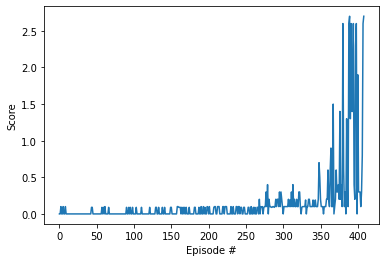

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

We can now go ahead and close the environment.

In [11]:
env.close()

### 3. Ideas for Future Work

Having gone through Udacity's Knowledge portal, I see there are many things I can experiment with:

- Some people have gotten better performance with using a bigger buffer or minibatch size, different learning rates, and different architectures for the DNNs that correspond to the Actor and Critic.

- Other algorithms covered in the lecture like A3C, A2C, and GAE.

- Adapting the code to work with the Unity Soccer environment.